In [181]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

In [183]:
df = pd.read_csv(r"C:\Users\yenib\OneDrive\Masaüstü\heart.csv")

In [185]:
df.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [187]:
df.shape

(303, 14)

In [189]:
df.columns

Index(['age', 'sex', 'cp', 'trtbps', 'chol', 'fbs', 'restecg', 'thalachh',
       'exng', 'oldpeak', 'slp', 'caa', 'thall', 'output'],
      dtype='object')

In [191]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trtbps    303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalachh  303 non-null    int64  
 8   exng      303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slp       303 non-null    int64  
 11  caa       303 non-null    int64  
 12  thall     303 non-null    int64  
 13  output    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [193]:
df.isnull().sum()

age         0
sex         0
cp          0
trtbps      0
chol        0
fbs         0
restecg     0
thalachh    0
exng        0
oldpeak     0
slp         0
caa         0
thall       0
output      0
dtype: int64

In [195]:
df.describe()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [197]:
df.corr()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
age,1.000000,-0.098447,-0.068653,0.279351,0.213678,0.121308,-0.116211,-0.398522,0.096801,0.210013,-0.168814,0.276326,0.068001,-0.225439
sex,-0.098447,1.000000,-0.049353,-0.056769,-0.197912,0.045032,-0.058196,-0.044020,0.141664,0.096093,-0.030711,0.118261,0.210041,-0.280937
cp,-0.068653,-0.049353,1.000000,0.047608,-0.076904,0.094444,0.044421,0.295762,-0.394280,-0.149230,0.119717,-0.181053,-0.161736,0.433798
trtbps,0.279351,-0.056769,0.047608,1.000000,0.123174,0.177531,-0.114103,-0.046698,0.067616,0.193216,-0.121475,0.101389,0.062210,-0.144931
chol,0.213678,-0.197912,-0.076904,0.123174,1.000000,0.013294,-0.151040,-0.009940,0.067023,0.053952,-0.004038,0.070511,0.098803,-0.085239
fbs,0.121308,0.045032,0.094444,0.177531,0.013294,1.000000,-0.084189,-0.008567,0.025665,0.005747,-0.059894,0.137979,-0.032019,-0.028046
restecg,-0.116211,-0.058196,0.044421,-0.114103,-0.151040,-0.084189,1.000000,0.044123,-0.070733,-0.058770,0.093045,-0.072042,-0.011981,0.137230
thalachh,-0.398522,-0.044020,0.295762,-0.046698,-0.009940,-0.008567,0.044123,1.000000,-0.378812,-0.344187,0.386784,-0.213177,-0.096439,0.421741
exng,0.096801,0.141664,-0.394280,0.067616,0.067023,0.025665,-0.070733,-0.378812,1.000000,0.288223,-0.257748,0.115739,0.206754,-0.436757
oldpeak,0.210013,0.096093,-0.149230,0.193216,0.053952,0.005747,-0.058770,-0.344187,0.288223,1.000000,-0.577537,0.222682,0.210244,-0.430696


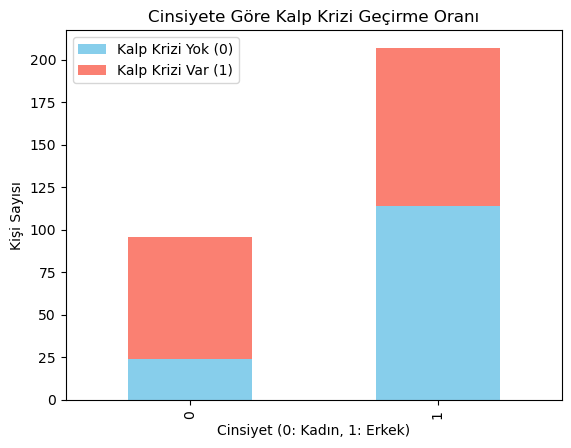

In [199]:

# Cinsiyet ve sonuç arasındaki ilişki
sex_output = pd.crosstab(df['sex'], df['output'])
sex_output.plot(kind='bar', stacked=True, color=['skyblue', 'salmon'])
plt.title('Cinsiyete Göre Kalp Krizi Geçirme Oranı')
plt.xlabel('Cinsiyet (0: Kadın, 1: Erkek)')
plt.ylabel('Kişi Sayısı')
plt.legend(['Kalp Krizi Yok (0)', 'Kalp Krizi Var (1)'])
plt.show()

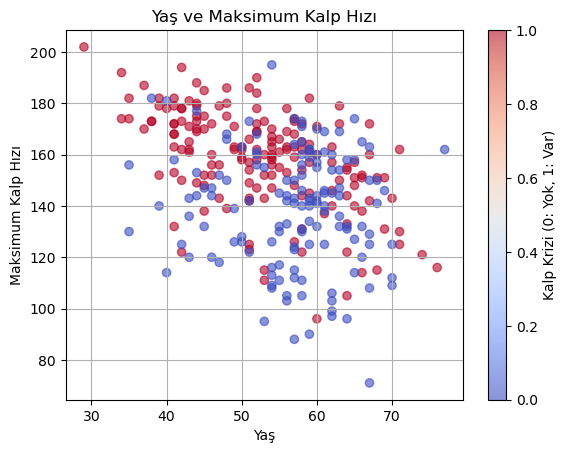

In [200]:
# Yaş ve maksimum kalp hızı
plt.scatter(df['age'], df['thalachh'], c=df['output'], cmap='coolwarm', alpha=0.6)
plt.title('Yaş ve Maksimum Kalp Hızı')
plt.xlabel('Yaş')
plt.ylabel('Maksimum Kalp Hızı')
plt.colorbar(label='Kalp Krizi (0: Yok, 1: Var)')
plt.grid(True)
plt.show()

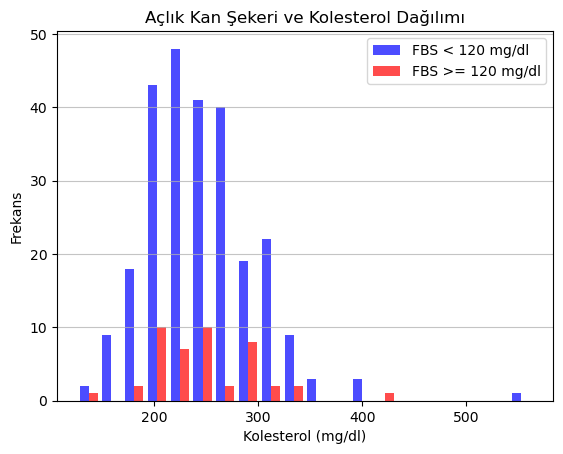

In [203]:
# Açlık kan şekeri ve kolesterol
fbs_0 = df[df['fbs'] == 0]['chol']
fbs_1 = df[df['fbs'] == 1]['chol']
plt.hist([fbs_0, fbs_1], bins=20, color=['blue', 'red'], alpha=0.7, label=['FBS < 120 mg/dl', 'FBS >= 120 mg/dl'])
plt.title('Açlık Kan Şekeri ve Kolesterol Dağılımı')
plt.xlabel('Kolesterol (mg/dl)')
plt.ylabel('Frekans')
plt.legend()
plt.grid(axis='y', alpha=0.75)
plt.show()

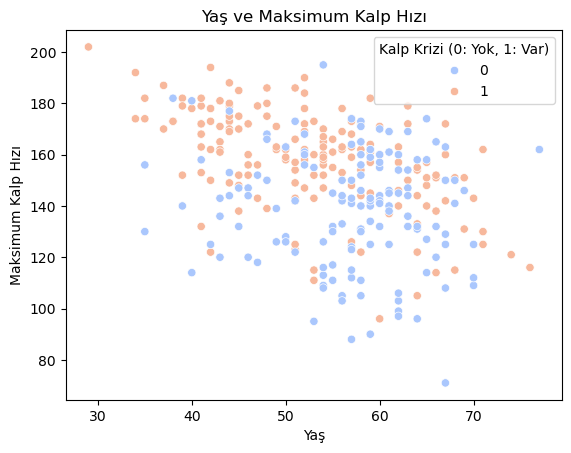

In [204]:
# Yaş ve maksimum kalp hızı arasındaki ilişki
sns.scatterplot(x='age', y='thalachh', hue='output', data=df, palette='coolwarm')
plt.title('Yaş ve Maksimum Kalp Hızı')
plt.xlabel('Yaş')
plt.ylabel('Maksimum Kalp Hızı')
plt.legend(title='Kalp Krizi (0: Yok, 1: Var)')
plt.show()

C:\Users\yenib\AppData\Local\Temp\ipykernel_28760\195163754.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='cp', y='trtbps', data=df, palette='pastel')


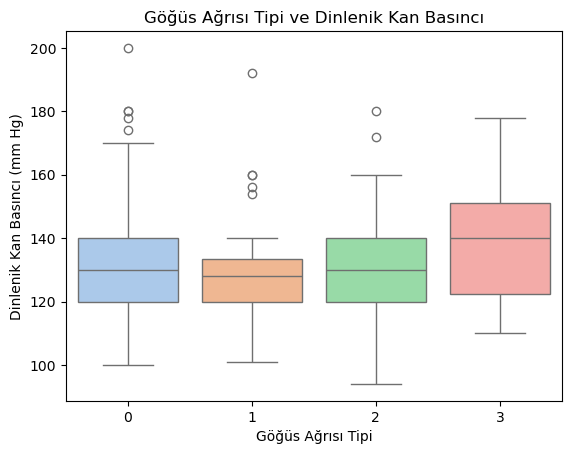

In [205]:
# Göğüs ağrısı tipi ve dinlenik kan basıncı
sns.boxplot(x='cp', y='trtbps', data=df, palette='pastel')
plt.title('Göğüs Ağrısı Tipi ve Dinlenik Kan Basıncı')
plt.xlabel('Göğüs Ağrısı Tipi')
plt.ylabel('Dinlenik Kan Basıncı (mm Hg)')
plt.show()

C:\Users\yenib\AppData\Local\Temp\ipykernel_28760\3199527061.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='sex', data=df, palette='Set1')


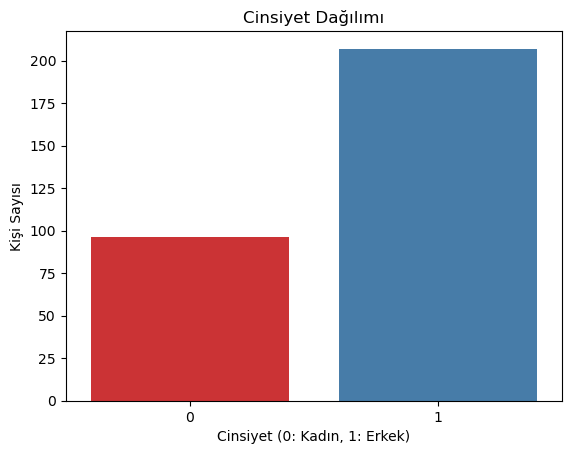

In [206]:
# Cinsiyet dağılımı
sns.countplot(x='sex', data=df, palette='Set1')
plt.title('Cinsiyet Dağılımı')
plt.xlabel('Cinsiyet (0: Kadın, 1: Erkek)')
plt.ylabel('Kişi Sayısı')
plt.show()


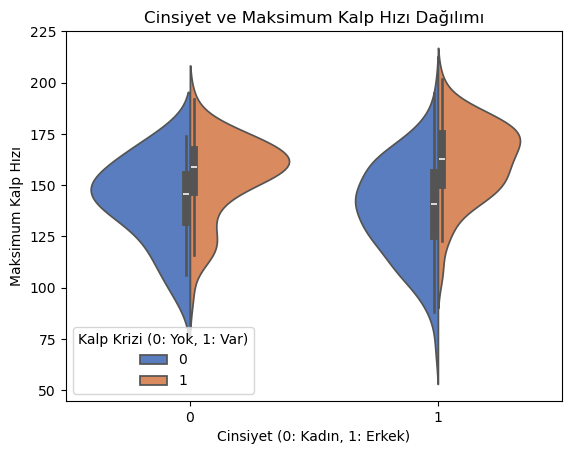

In [207]:
# Yaşa göre maksimum kalp hızı dağılımı
sns.violinplot(x='sex', y='thalachh', hue='output', data=df, split=True, palette='muted')
plt.title('Cinsiyet ve Maksimum Kalp Hızı Dağılımı')
plt.xlabel('Cinsiyet (0: Kadın, 1: Erkek)')
plt.ylabel('Maksimum Kalp Hızı')
plt.legend(title='Kalp Krizi (0: Yok, 1: Var)')
plt.show()


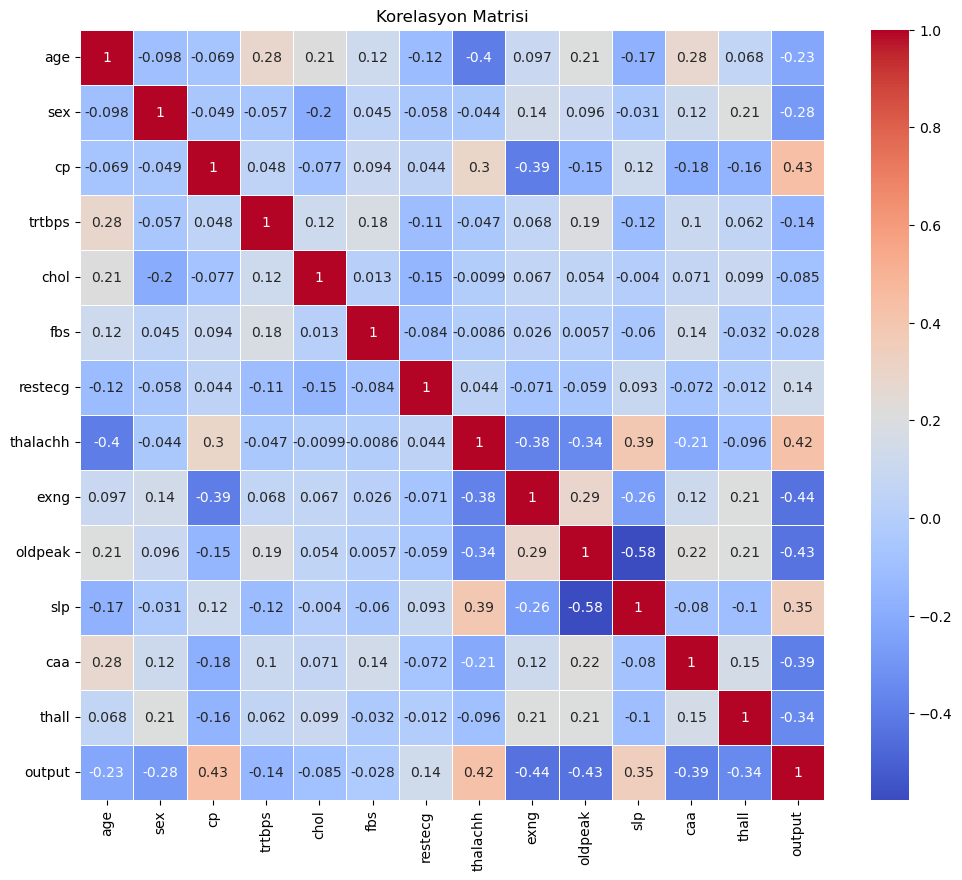

In [208]:
# Korelasyon matrisi
correlation_matrix = df.corr()
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Korelasyon Matrisi')
plt.show()


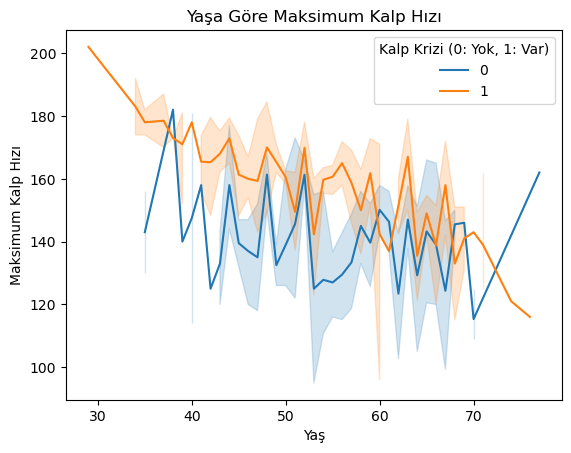

In [209]:
# Yaşa göre maksimum kalp hızı çizgi grafiği
sns.lineplot(x='age', y='thalachh', data=df, hue='output', palette='tab10')
plt.title('Yaşa Göre Maksimum Kalp Hızı')
plt.xlabel('Yaş')
plt.ylabel('Maksimum Kalp Hızı')
plt.legend(title='Kalp Krizi (0: Yok, 1: Var)')
plt.show()


In [210]:
y=df['output']
x=df.drop("output",axis=1)

In [211]:
x_train,x_test,y_train,y_test = train_test_split(x,y,random_state=42,train_size=0.7)

In [212]:
dt = DecisionTreeClassifier()
model = dt.fit(x,y)
model.score(x,y)

1.0

In [230]:
#Overfitting

In [232]:
dt = DecisionTreeClassifier()
model = dt.fit(x_train,y_train)
model.score(x_test,y_test)

0.7142857142857143

In [240]:
dt = RandomForestClassifier(n_estimators=200)
model = dt.fit(x_train,y_train)
model.score(x_test,y_test)

0.8131868131868132

In [238]:
dt = xgb.XGBClassifier()
model = dt.fit(x_train,y_train)
model.score(x_test,y_test)

0.8131868131868132

In [252]:
df.sample().drop("output",axis=1).values

array([[ 52.,   1.,   1., 128., 205.,   1.,   1., 184.,   0.,   0.,   2.,
          0.,   2.]])

In [254]:
human = df.sample().drop("output",axis=1).values

In [256]:
model.predict(human)

C:\Users\yenib\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


array([0], dtype=int64)

In [ ]:
#Kalp krizi yok tahmini